#Web Series Analysis:-

#Problem Statements:-

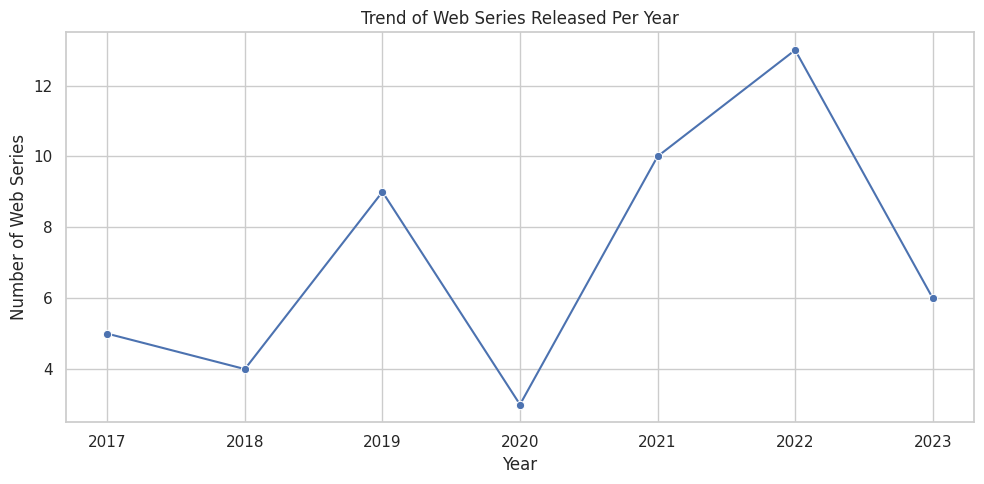

In [5]:
#Task 1: Trend of Web Series Released Per Year
#Goal: Use a Line Chart to visualize the trend of web series released over time

release_trend = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o')
plt.title('Trend of Web Series Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Web Series')
plt.tight_layout()
plt.show()


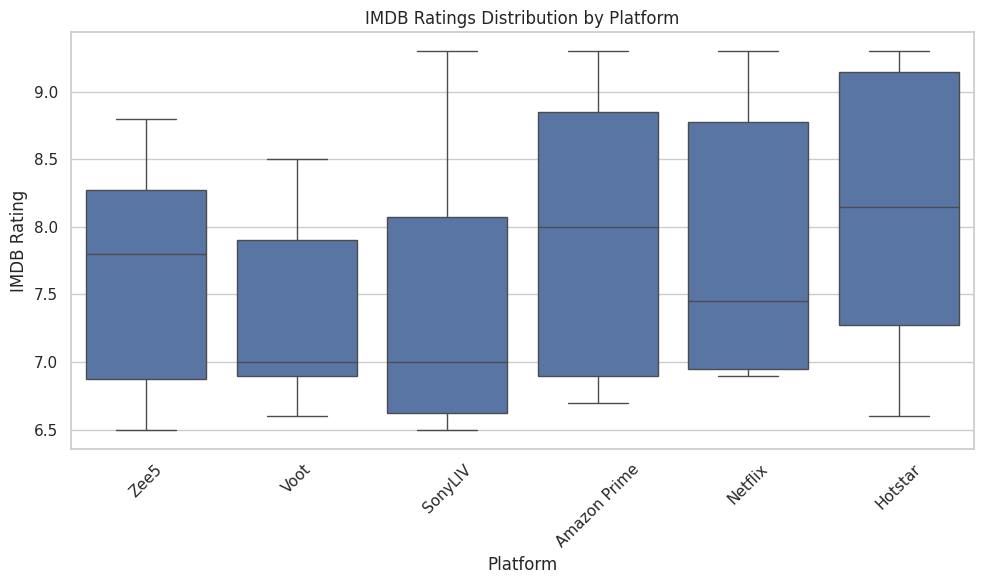

In [6]:
#Task 2: Distribution of IMDB Ratings Across Streaming Platforms
#Goal: Use a Box Plot to analyze how IMDB ratings vary across different streaming platforms.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Platform', y='IMDB Rating')
plt.title('IMDB Ratings Distribution by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-1854516102.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, y='Title', x='IMDB Rating', palette='viridis')


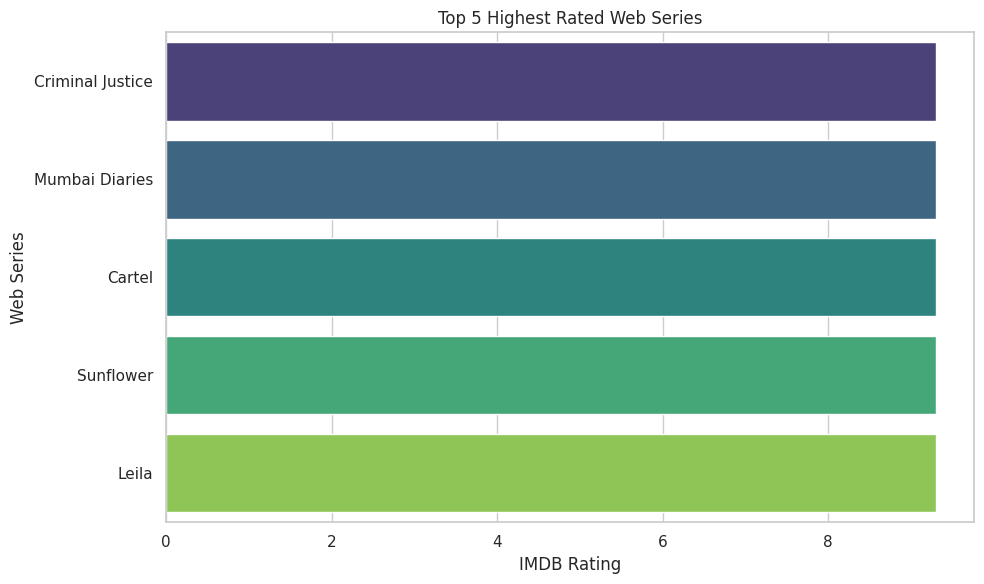

In [7]:
#Task 3: Top 5 Highest Rated Web Series
#Goal: Use a Horizontal Bar Chart to showcase the top 5 web series with the highest IMDB ratings.

top_5 = df.sort_values(by='IMDB Rating', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5, y='Title', x='IMDB Rating', palette='viridis')
plt.title('Top 5 Highest Rated Web Series')
plt.xlabel('IMDB Rating')
plt.ylabel('Web Series')
plt.tight_layout()
plt.show()

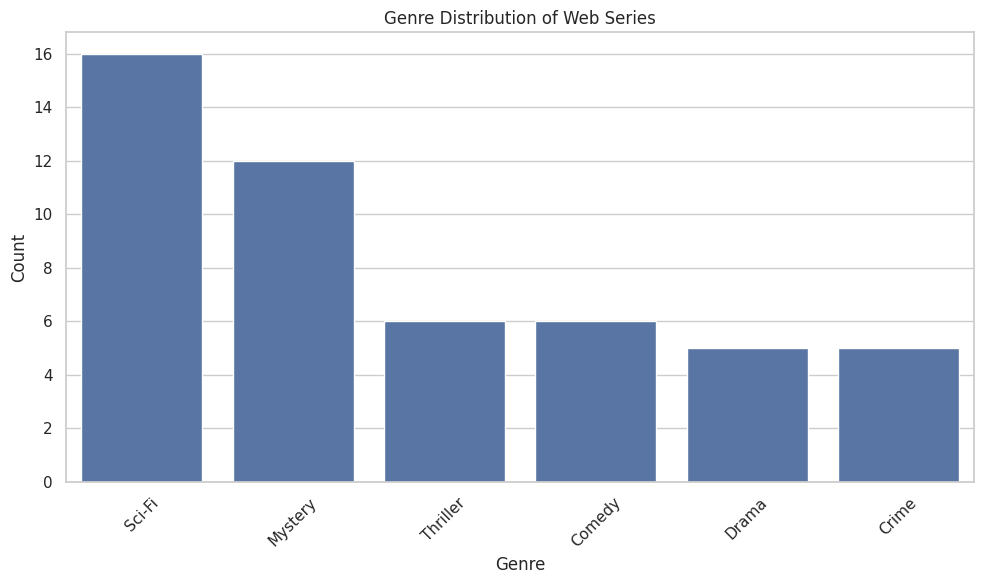

In [8]:
#Task 4: Genre Distribution of Web Series
#Goal: Use a Bar Chart to show the count of web series belonging to each genre.

genre_count = df['Genre'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.index, y=genre_count.values)
plt.title('Genre Distribution of Web Series')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

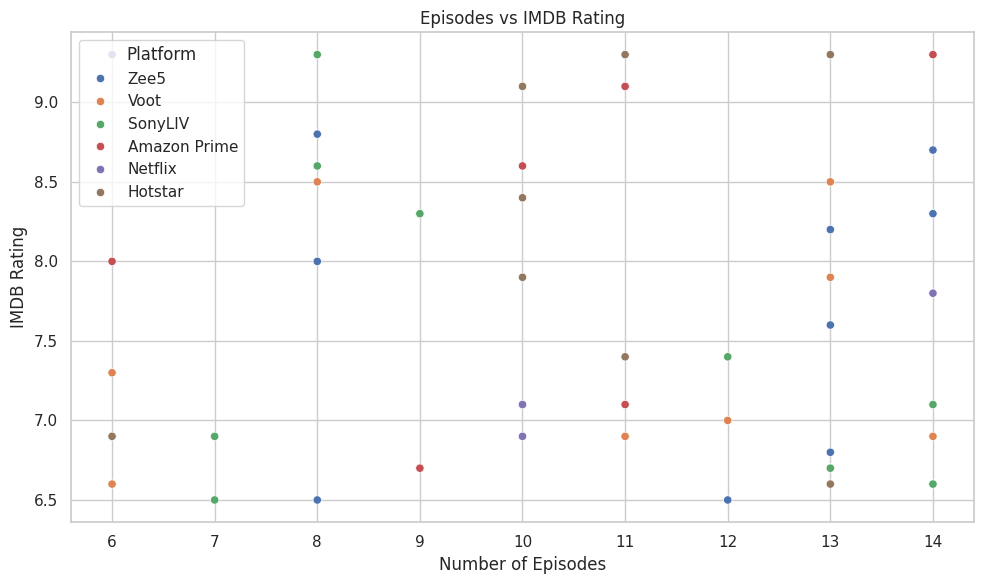

In [9]:
# Task 5: Relationship Between Number of Episodes and IMDB Rating
#Goal: Use a Scatter Plot to observe if web series with more episodes tend to have higher ratings.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Episodes', y='IMDB Rating', hue='Platform')
plt.title('Episodes vs IMDB Rating')
plt.xlabel('Number of Episodes')
plt.ylabel('IMDB Rating')
plt.tight_layout()
plt.show()

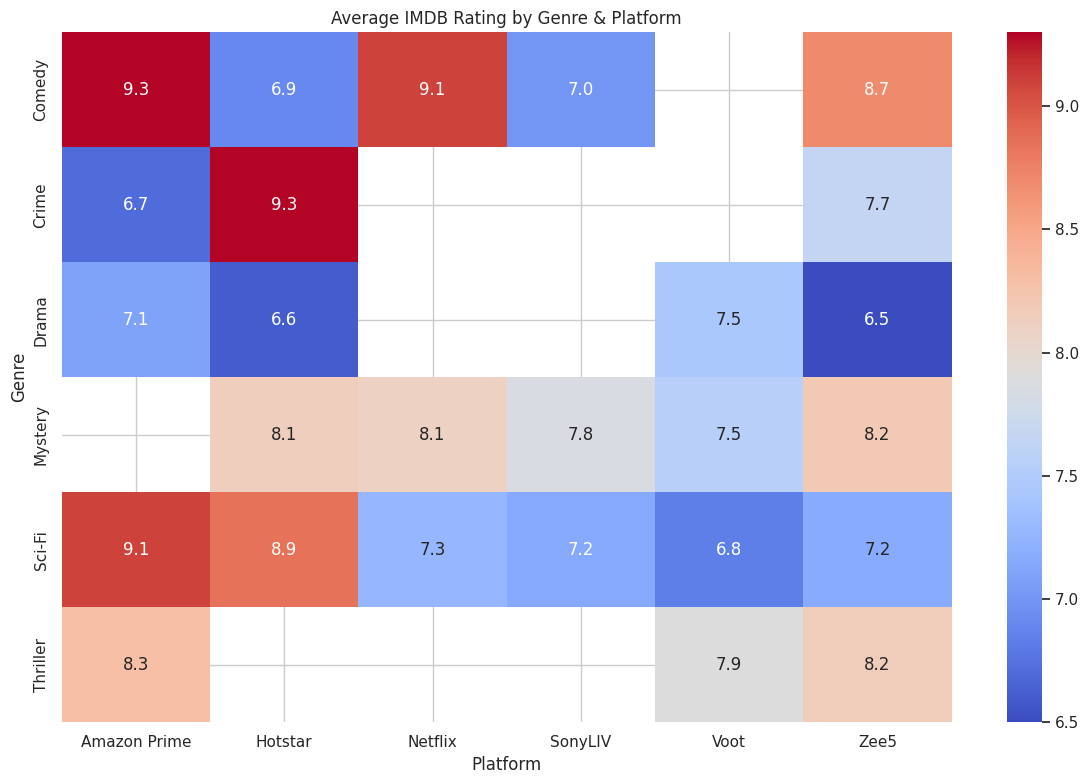

In [11]:
#Task 6: Platform-Wise Average IMDB Rating by Genre
#Goal: Analyze which genres perform best on which streaming platforms in terms of average IMDB ratings.
#Visualization: Heatmap (Rows = Genre, Columns = Platform, Color = Avg. IMDB Rating)

pivot = df.pivot_table(values='IMDB Rating', index='Genre', columns='Platform', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average IMDB Rating by Genre & Platform')
plt.tight_layout()
plt.show()

/tmp/ipython-input-12-2695450884.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('Episodes_per_Season', ascending=False),


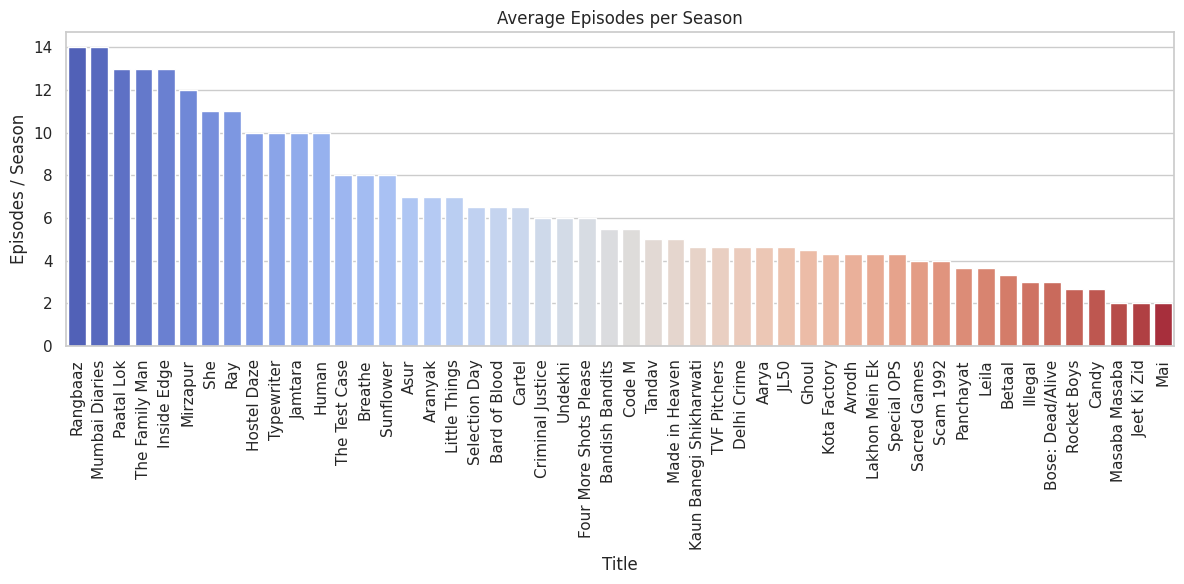

In [12]:
#Task 7: Episodes Per Season Analysis
#Goal: Compute and compare the average number of episodes per season for each web series.
#Visualization: Bar Chart or Bubble Chart (Series on X-axis, Episodes/Season ratio as value)

df['Episodes_per_Season'] = df['Episodes'] / df['Seasons']

plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values('Episodes_per_Season', ascending=False),
            x='Title', y='Episodes_per_Season', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Episodes per Season')
plt.ylabel('Episodes / Season')
plt.tight_layout()
plt.show()

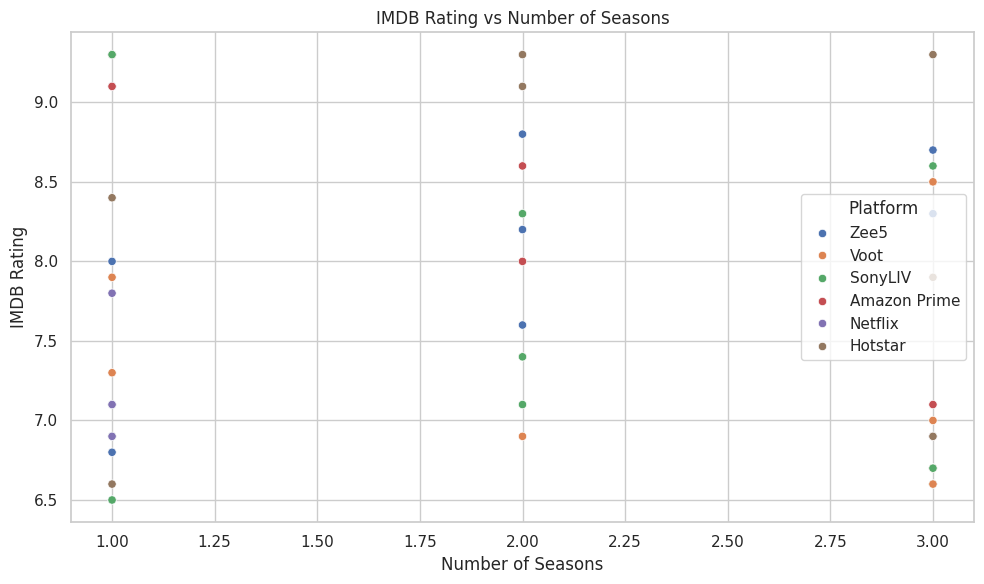

In [13]:
#Task 8: IMDB Rating vs. Number of Seasons (Grouped by Platform)
#Goal: Examine if there's a trend between the number of seasons and IMDB ratings, broken down by platform.
#Visualization: Scatter Plot with color/grouping by platform

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Seasons', y='IMDB Rating', hue='Platform')
plt.title('IMDB Rating vs Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('IMDB Rating')
plt.tight_layout()
plt.show()

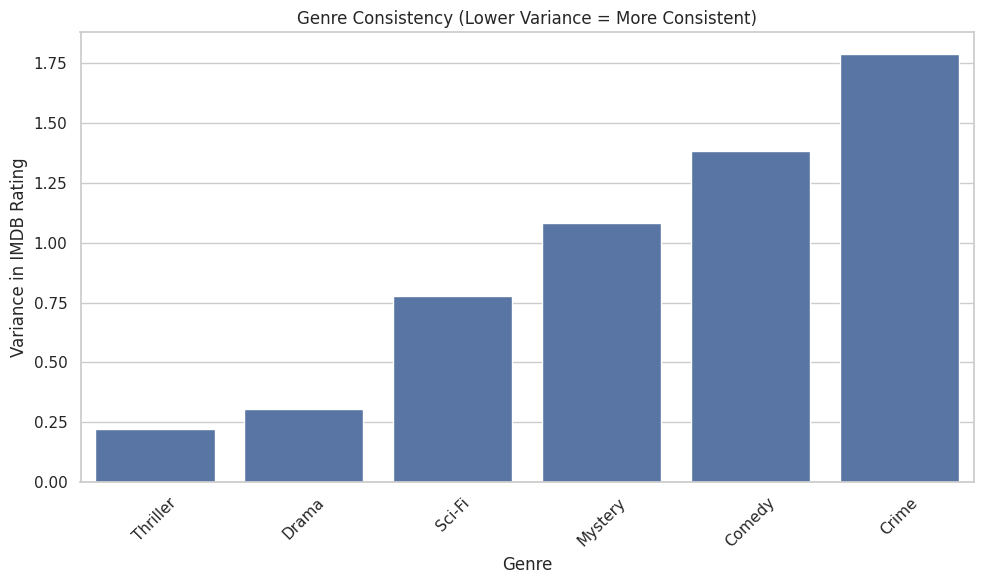

In [14]:
#Task 9: Identify the Most Consistent Genre in Ratings
#Goal: Find the genre with the lowest variance in IMDB ratings (i.e., most consistent viewer reception).
#Visualization: Table or Bar Chart with genre and rating variance

genre_variance = df.groupby('Genre')['IMDB Rating'].var().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_variance.index, y=genre_variance.values)
plt.title('Genre Consistency (Lower Variance = More Consistent)')
plt.ylabel('Variance in IMDB Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Task 10: Highlight Web Series with Above-Average Ratings in Each Genre
#Goal: For each genre, list web series that have an IMDB rating higher than the genre’s average.
#Visualization: Filtered Bar Chart or Table view, with conditional formatting on ratings.

above_avg = pd.DataFrame()

for genre in df['Genre'].unique():
    genre_df = df[df['Genre'] == genre]
    avg_rating = genre_df['IMDB Rating'].mean()
    filtered = genre_df[genre_df['IMDB Rating'] > avg_rating]
    above_avg = pd.concat([above_avg, filtered])

# Display results in a simple table
above_avg[['Title', 'Genre', 'IMDB Rating']].sort_values(by='Genre')

,Title,Genre,IMDB Rating
38,JL50,Comedy,8.7
24,Ray,Comedy,9.1
25,Mumbai Diaries,Comedy,9.3
0,Sacred Games,Crime,8.8
31,Leila,Crime,9.3
3,Paatal Lok,Drama,7.9
10,Panchayat,Drama,7.1
9,Kota Factory,Mystery,8.5
11,Criminal Justice,Mystery,9.3
16,Bard of Blood,Mystery,8.2
